# Assignment: Classification

Classification refers to categorizing the given data into classes. For example,
- Given an image of hand-written character, identifying the character (multi-class classification)
- Given an image, annotating it with all the objects present in the image (multi-label classification)
- Classifying an email as spam or non-spam (binary classification)
- Classifying a tumor as benign or malignant and so on

In this assignment, we will be building a classifier to classify emails as spam or non-spam. We will be using the Kaggle dataset [Spam or Not Spam Dataset](https://www.kaggle.com/datasets/ozlerhakan/spam-or-not-spam-dataset?resource=download) for this task. 

**Note**: You cannot load any libraries other than the mentioned ones.




### Data pre-processing
The first step in every machine learning algorithm is to process the raw data in some meaningful representations. We will be using the [Bag-of-Words](https://towardsdatascience.com/a-simple-explanation-of-the-bag-of-words-model-b88fc4f4971) representation to process the text. It comprises of following steps:

- Process emails line-by-line to extract all the words.
- Replace extracted words by their stem (root) word. This is known as stemming and lematization.
- Remove stop words like and, or, is, am, and so on.
- Assign a unique index to each word. This forms the vocabulary.
- Represent each email as a binary vector of length equal to the size of the vocabulary such that the $i^{th}$ element of the vector is 1 iff the $i^th$ word is present in the email.

Here we provide you with the function signature along with the expected functionality. You are expected to complete them accordingly. 

In [1]:
import numpy as np
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [2]:
# takes an email as an argument
# read email line-by-line and extract all the words
# return list of exracted words
def read_email(email):
    words = email.split(" ")
    return words

In [3]:
# takes a list of words as an argument
# replace each word by their stem word
# return list of stem words
def stemming(list_of_words):
    porter = PorterStemmer()
    stem_words = [porter.stem(word) for word in list_of_words]
    return stem_words

In [4]:
# takes a list of stem-words as an argument
# remove stop words
# return list of stem words after removing stop words
def remove_stop_words(list_of_stem_words):
    stop_words = set(stopwords.words('english'))
    stem_no_stop_words = [w for w in list_of_stem_words if not w.lower() in stop_words]
    return stem_no_stop_words

In [5]:
# takes a list of stem-words as an argument
# add new words to the vocabulary and assign a unique index to them
# returns new vocabulary
def build_vocabulary(list_of_stem_words):
    vocabulary = set()
    for word_list in list_of_stem_words:
        for word in word_list:
            vocabulary.add(word)
    vocab = [word for word in vocabulary]
    vocab.pop(0)

    return vocab

In [6]:
# takes a list of stem-words and vocabulary as an argument
# returns bow representation
def get_bow(list_of_stem_words, vocab):
    email_bow = []

    for data_list in list_of_stem_words:
        dict = {}
        for word in vocab:
            dict.update({word:0})
        for word in vocab:
            if word in data_list:
                dict[word] += 1
        email_bow.append(dict)

    return email_bow

In [7]:
# read the entire list_of_stem_words
# convert emails to bow and maintain their labels
# call function text_to_bow()
def read_data():
    results = []
    with open('spam_or_not_spam.csv', 'r', encoding='utf8') as f:
        for line in f:
                words = line.split(',')
                results.append([words[0], words[1][0][0]])
    spam_or_not_spam = results
    spam_or_not_spam.pop(0)
    list_of_stem_words = []
    data = []
    for mail in spam_or_not_spam:
        list_of_stem_words.append(remove_stop_words(stemming(read_email(mail[0]))))
    vocabulary = build_vocabulary(list_of_stem_words)
    vocabulary.pop(0)
    bows = get_bow(list_of_stem_words, vocabulary)
    for i in range(0,len(spam_or_not_spam)):
        data.append([bows[i], int(spam_or_not_spam[i][1])])
    
    return data,vocabulary

### Data Visualization
Let's understand the data distribution
- Visualize the frequency of word-occurence in all the emails(spam + non-spam)
- Visualize the freuency of word-occurence for spam and non-spam emails separately

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (100,50)

In [9]:
# visualize data distribution
def data_vis(data, vocabulary):
    dict_non_spam = {}
    dict_spam = {}
    dict_all = {}
    for word in vocabulary:
            dict_all.update({word:0})
            dict_non_spam.update({word:0})
            dict_spam.update({word:0})

    for ind_data in data:
        for key, value in ind_data[0].items():
            dict_all[key] += int(value)
            if ind_data[1] == 0:
                dict_non_spam[key] += int(value)
            else:
                dict_spam[key] += int(value)
    
    
    lists_all = dict_all.items()
    x_axis, y_axis = zip(*lists_all)
    plt.bar(x_axis, y_axis)
    plt.title("Spam + Non-Spam Plot")
    plt.show()

    lists_non_spam = dict_non_spam.items()
    x_axis, y_axis = zip(*lists_non_spam)
    plt.bar(x_axis, y_axis)
    plt.title("Non-Spam Plot")
    plt.show()

    lists_spam = dict_spam.items()
    x_axis, y_axis = zip(*lists_spam)
    plt.bar(x_axis, y_axis)
    plt.title("Spam Plot")
    plt.show()

C:\Users\ayush\.conda\envs\spam-classifier\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23427 (\N{CJK UNIFIED IDEOGRAPH-5B83}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ayush\.conda\envs\spam-classifier\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ayush\.conda\envs\spam-classifier\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50937 (\N{HANGUL SYLLABLE WEB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ayush\.conda\envs\spam-classifier\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ayush\.conda\envs\spam-classifier\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54609 (\N{HANGUL SYLLA

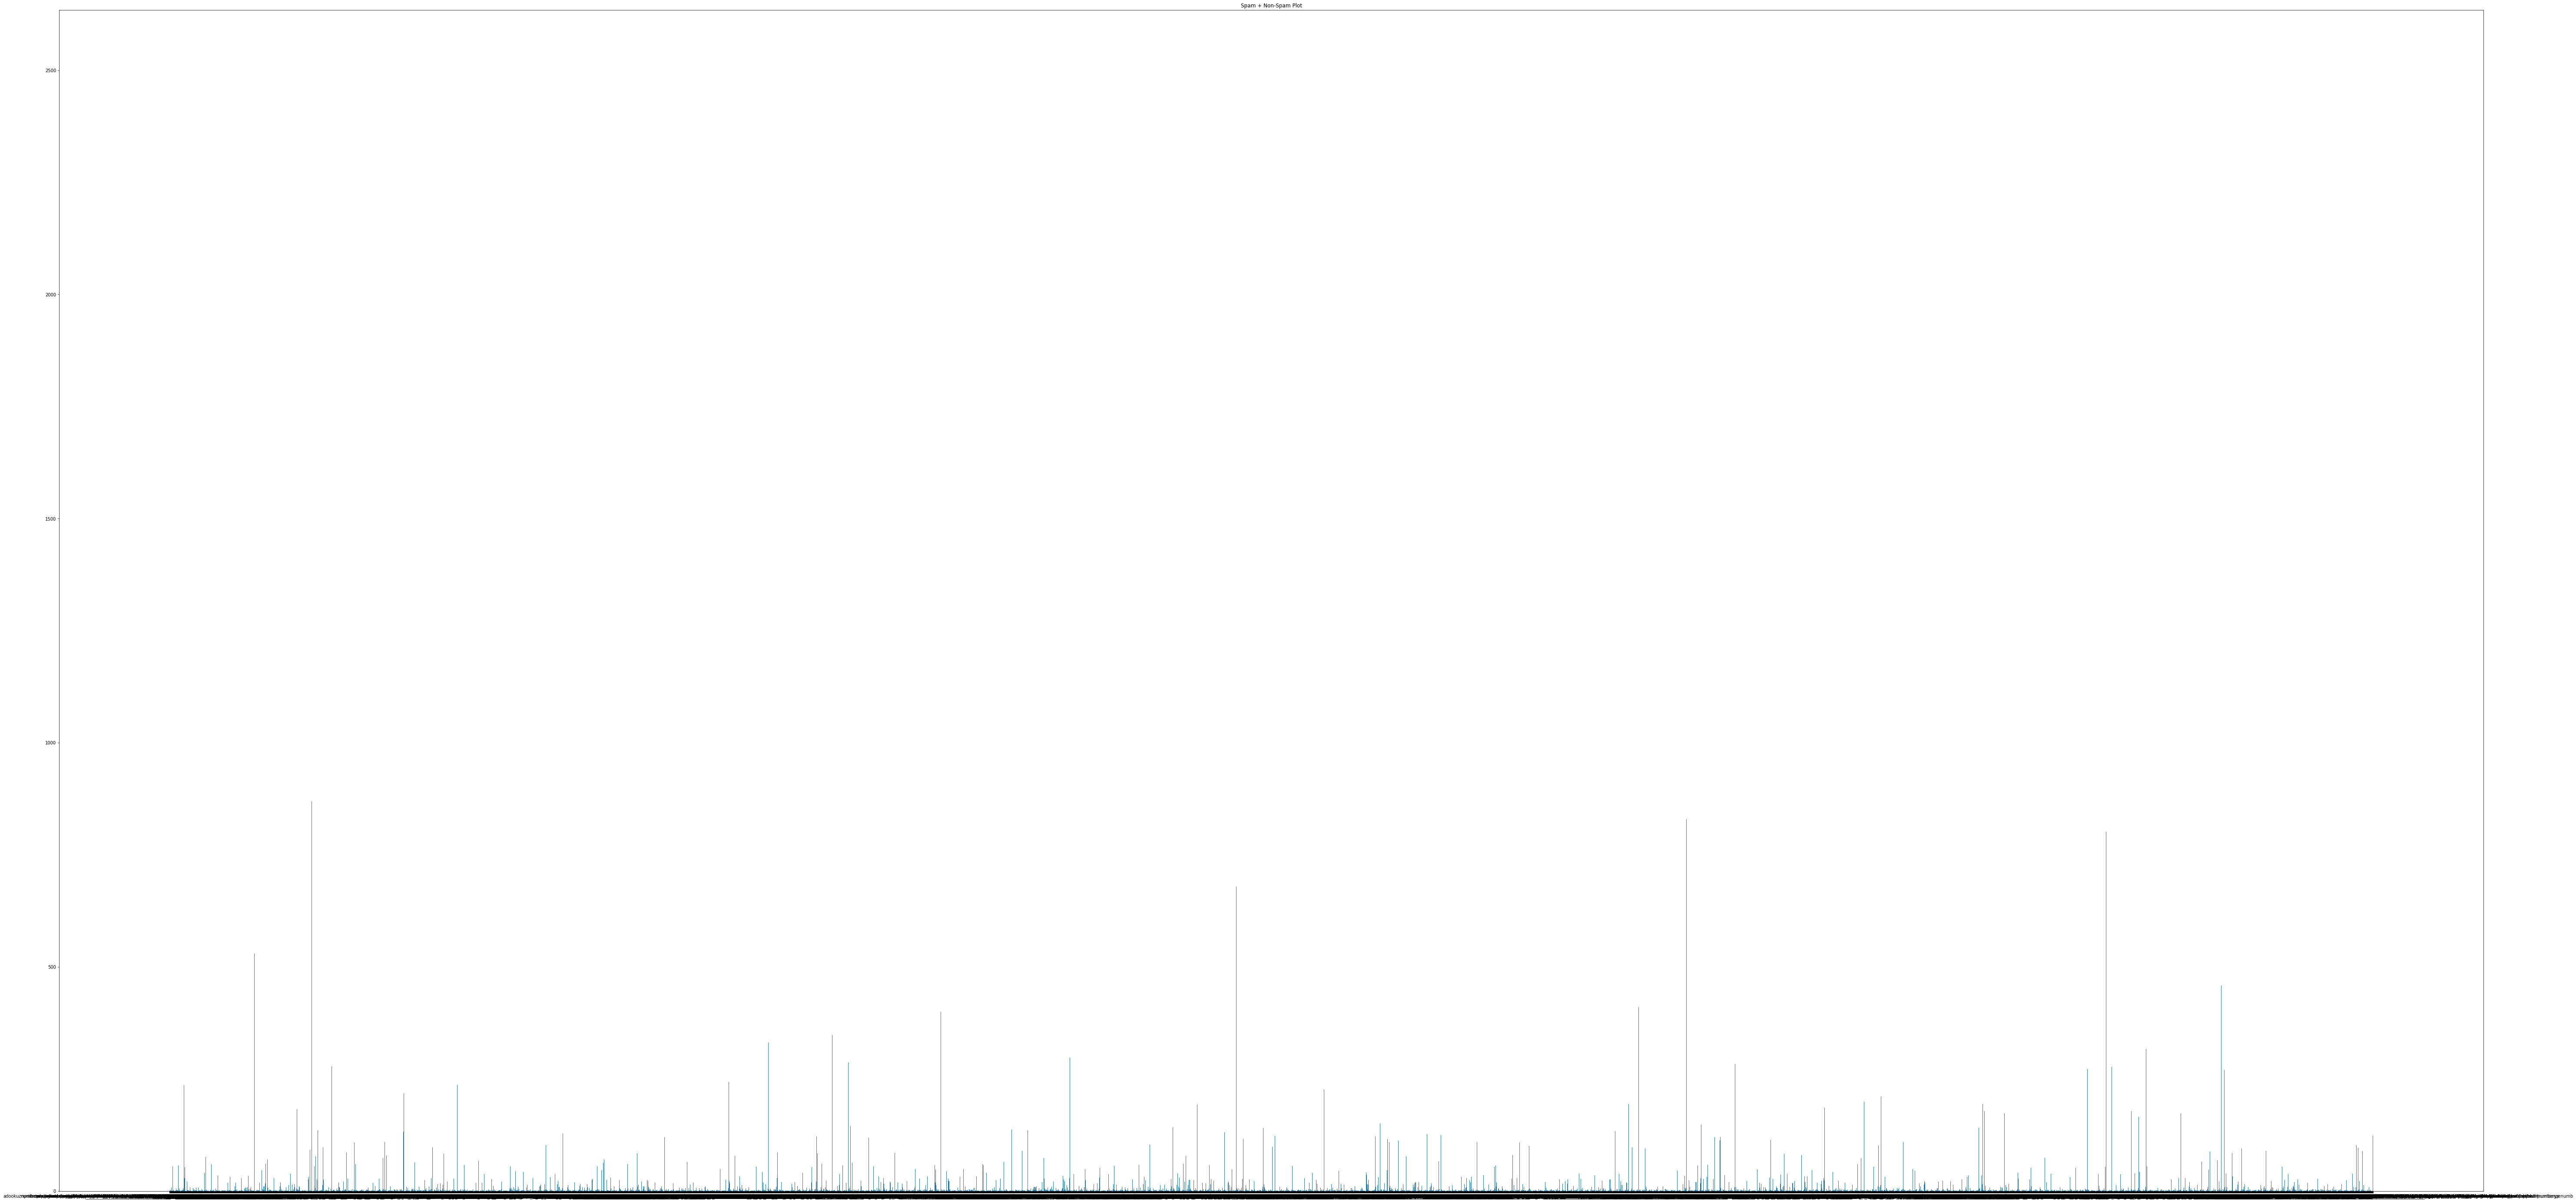

C:\Users\ayush\.conda\envs\spam-classifier\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23427 (\N{CJK UNIFIED IDEOGRAPH-5B83}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ayush\.conda\envs\spam-classifier\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ayush\.conda\envs\spam-classifier\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50937 (\N{HANGUL SYLLABLE WEB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ayush\.conda\envs\spam-classifier\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ayush\.conda\envs\spam-classifier\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54609 (\N{HANGUL SYLLA

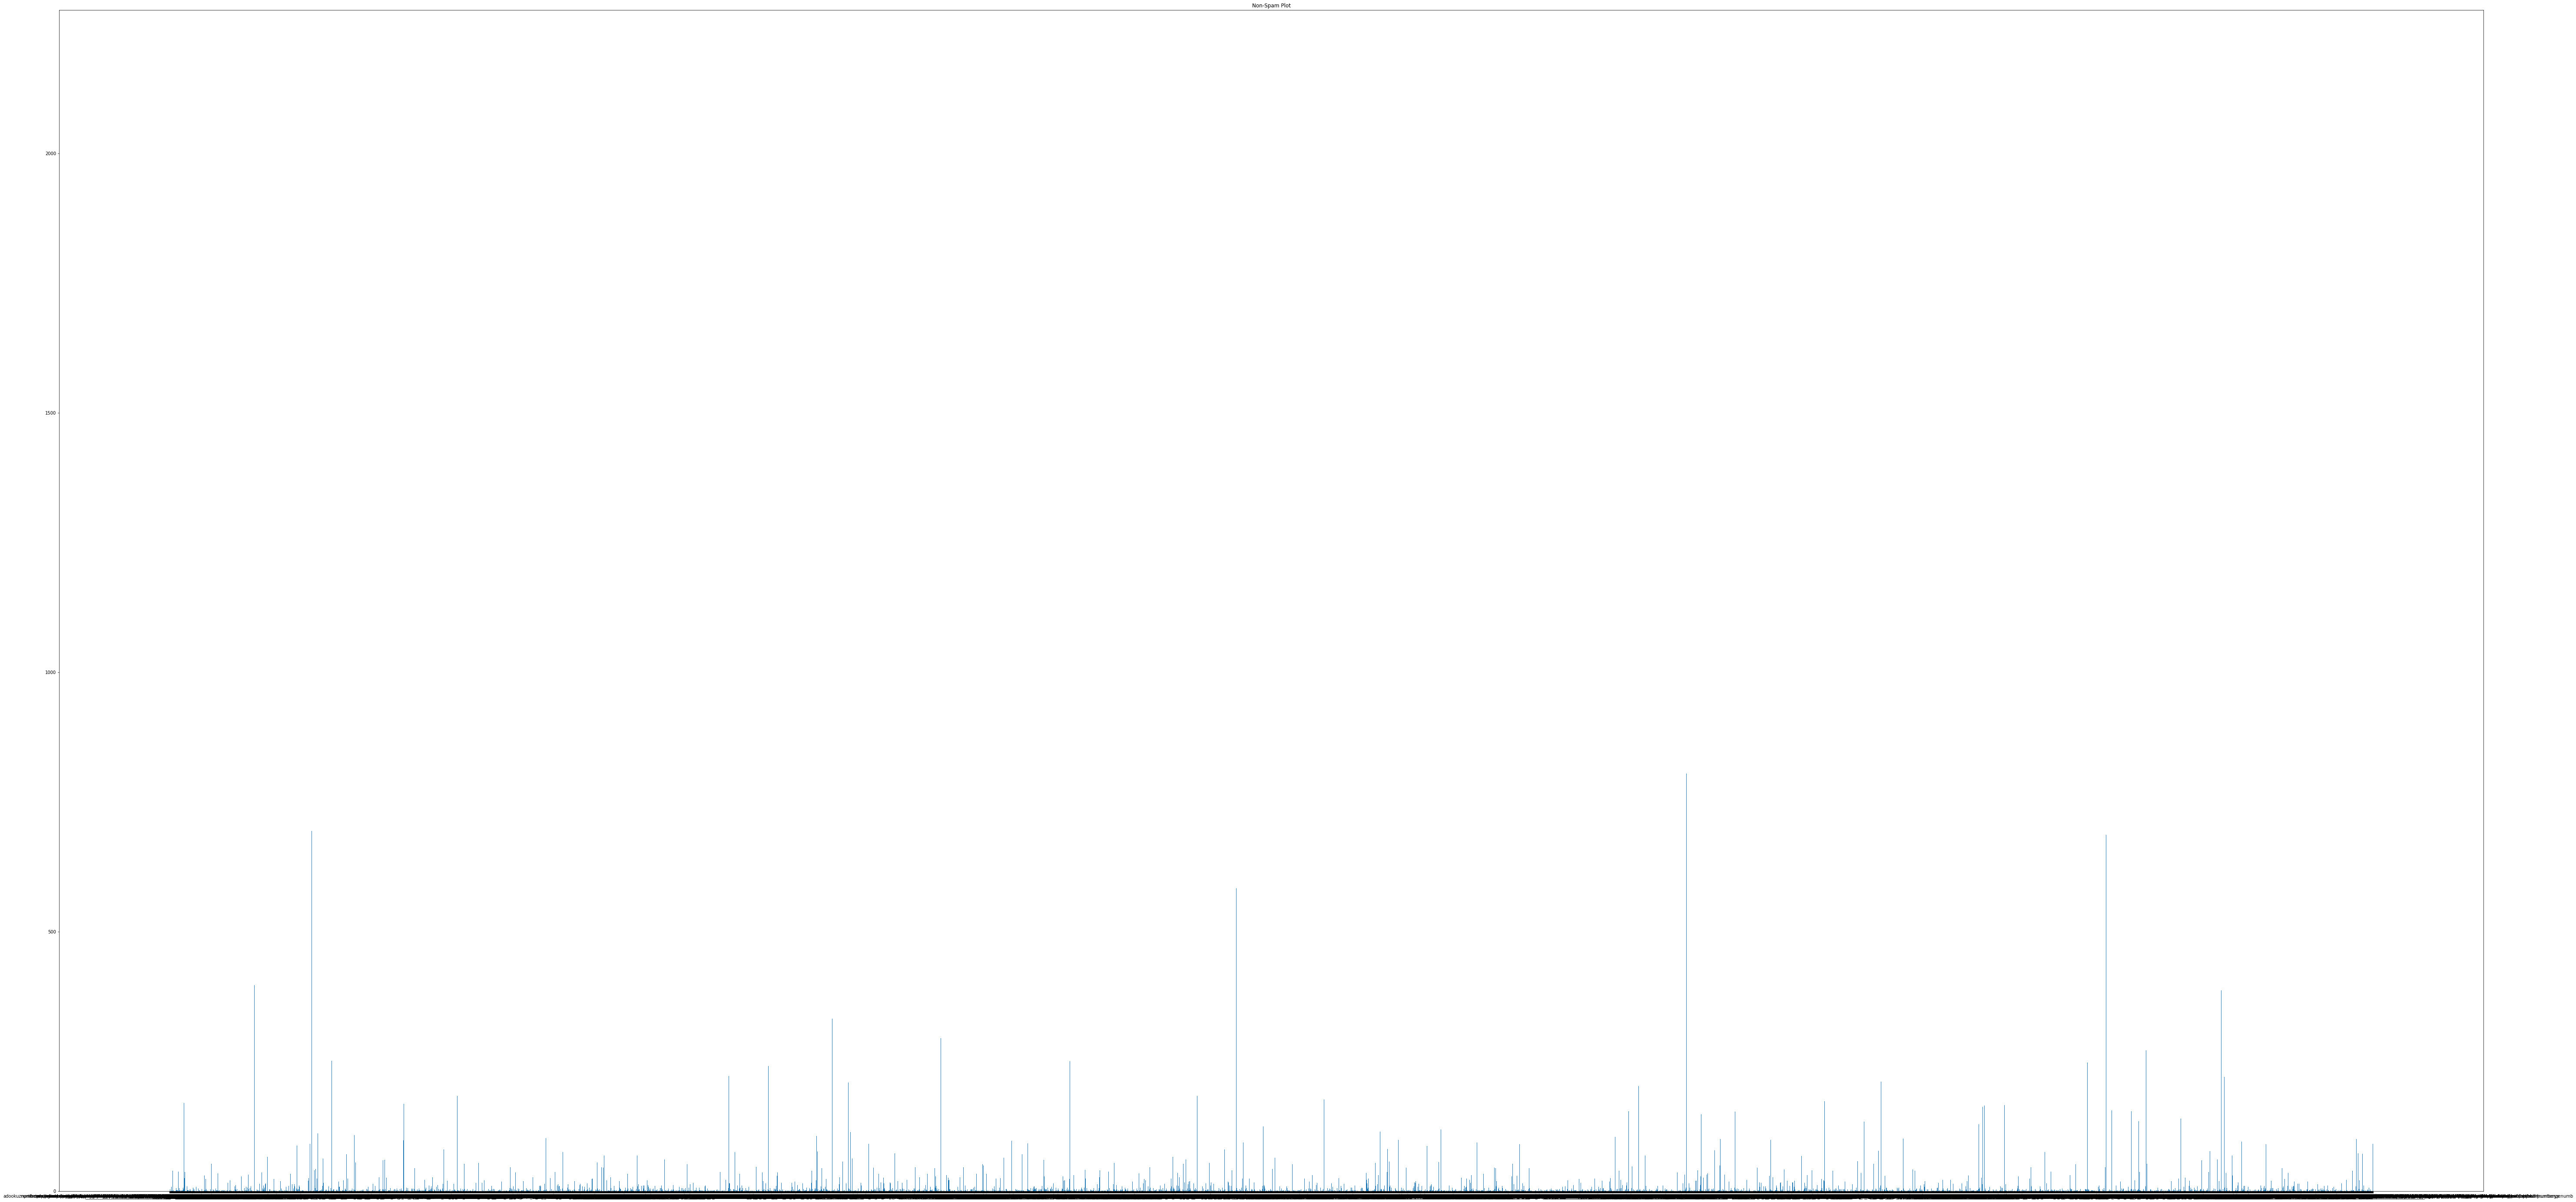

C:\Users\ayush\.conda\envs\spam-classifier\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23427 (\N{CJK UNIFIED IDEOGRAPH-5B83}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ayush\.conda\envs\spam-classifier\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ayush\.conda\envs\spam-classifier\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50937 (\N{HANGUL SYLLABLE WEB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ayush\.conda\envs\spam-classifier\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ayush\.conda\envs\spam-classifier\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54609 (\N{HANGUL SYLLA

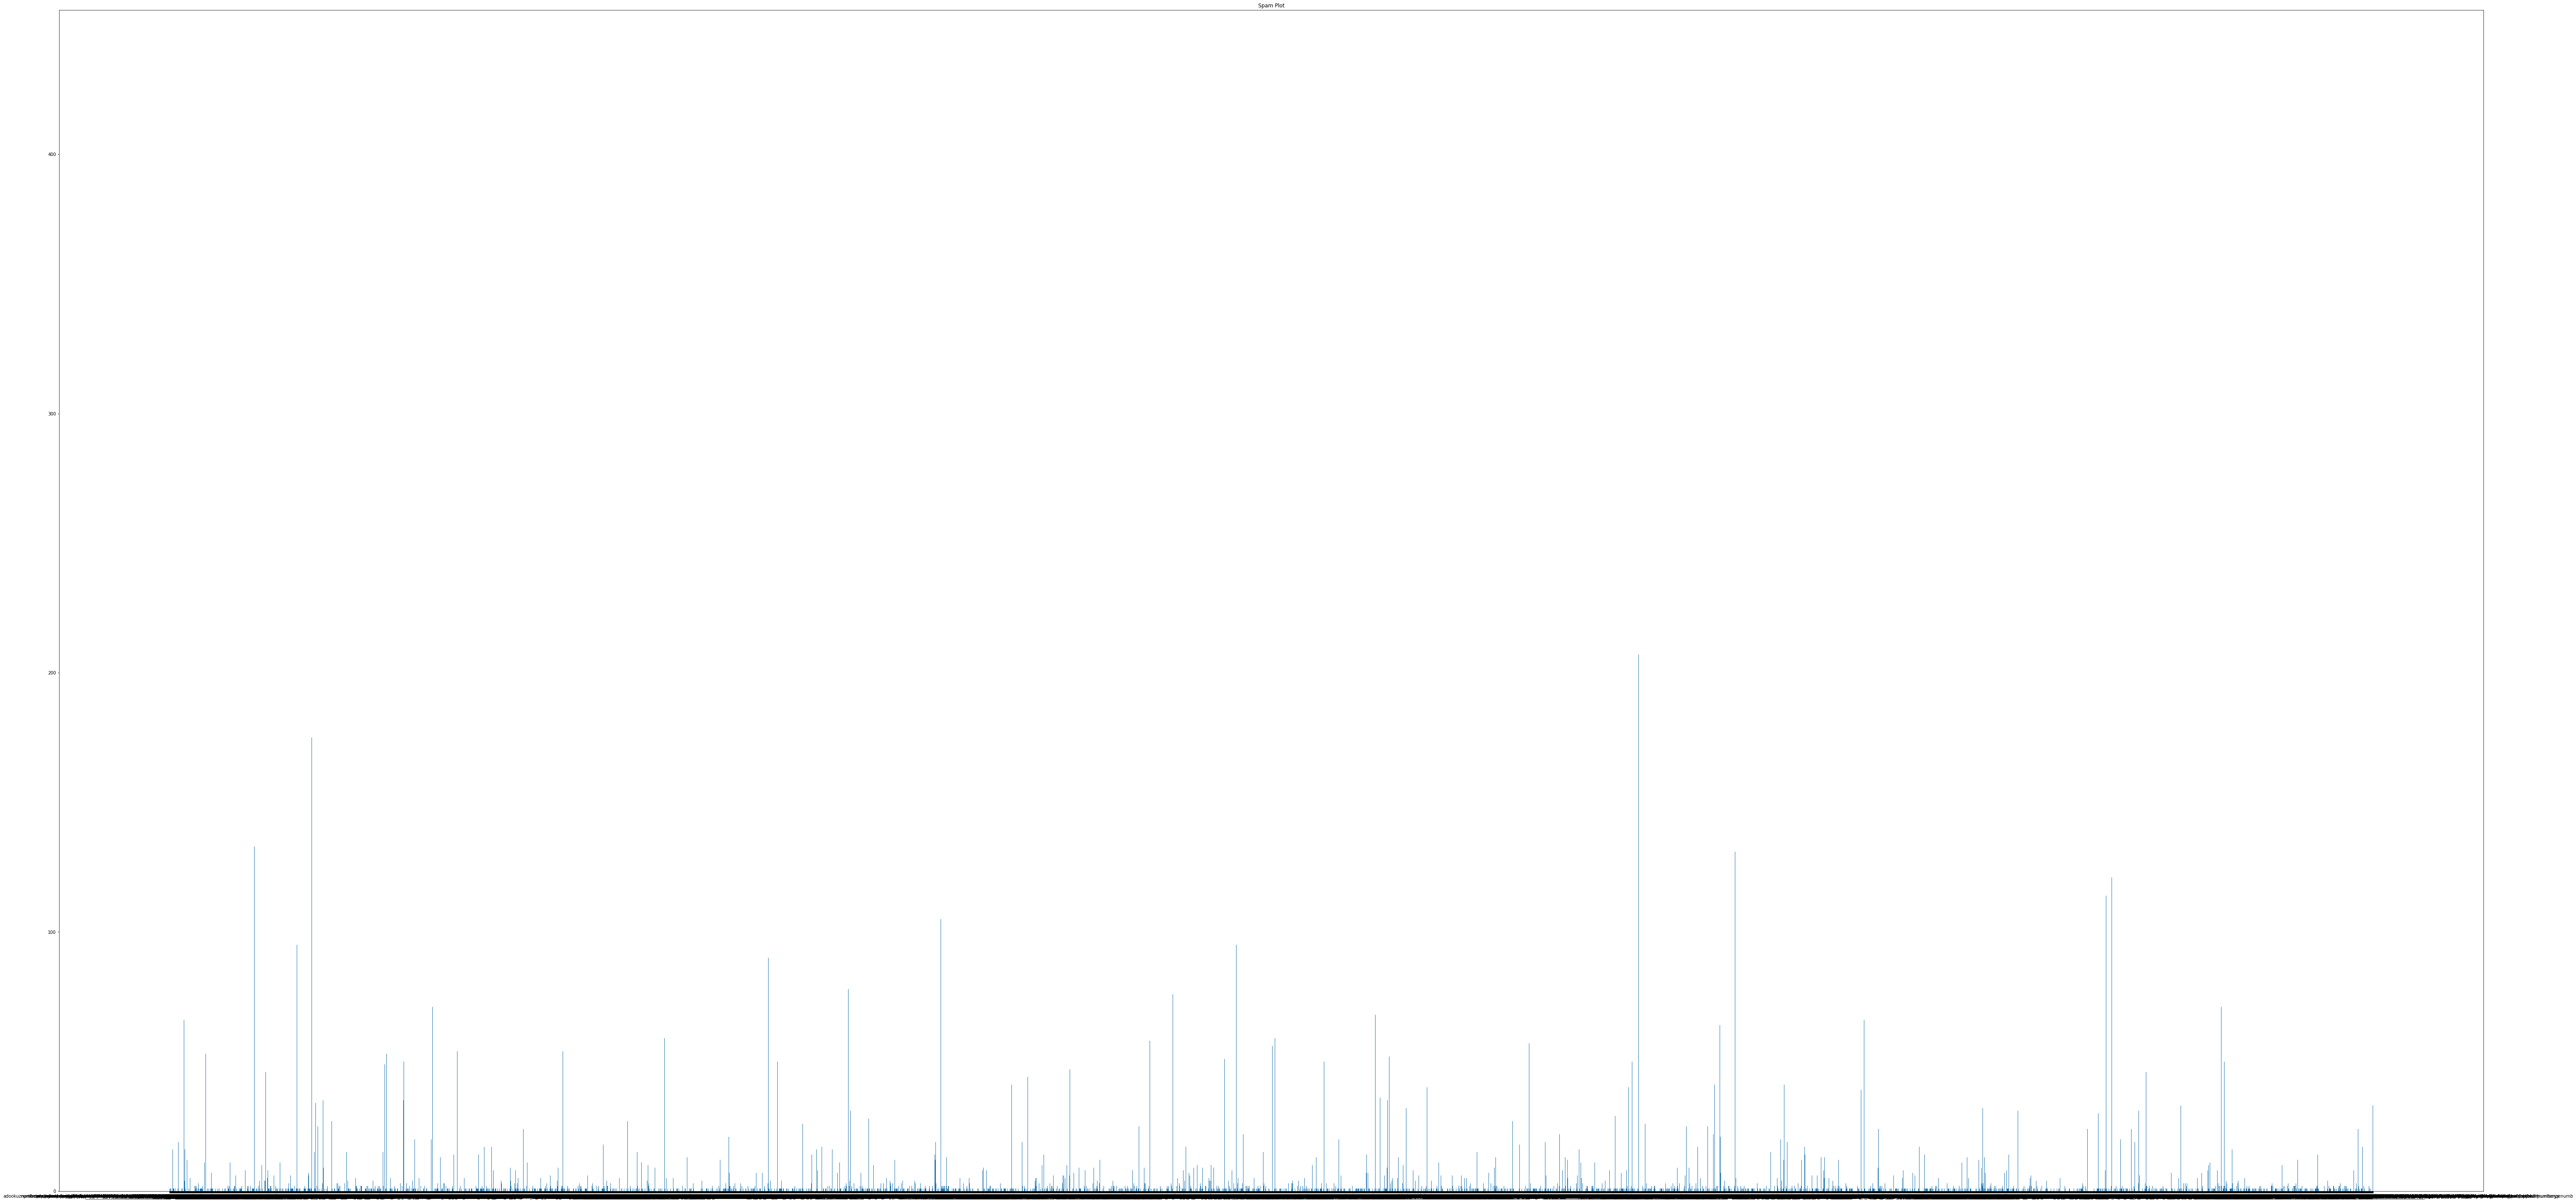

In [10]:
dict_data, vocabulary = read_data()
data_vis(dict_data, vocabulary)

### Learn a Classifier
Split the dataset randomly in the ratio 80:20 as the training and test dataset. Use only training dataset to learn the classifier. No test data should be used during training. Test data will only be used during evaluation.

Now let us try to use ML algorithms to classify emails as spam or non-spam. You are supposed to implement [SVM](https://scikit-learn.org/stable/modules/svm.html) and [K-Nearest Neighbour](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) algorithm available in scikit-learn using the same training dataset for both.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [12]:
# split dataset
def split(data):
    np.random.shuffle(data)
    i = 0
    mid_index = int(len(data)*8/10)
    train_data, test_data = [],[]
    for d in data:
        if i < mid_index:
            train_data.append(d)
        else:
            test_data.append(d)
        i += 1

    return train_data, test_data

In [13]:
# Seperate email bow representation and its labels
def data_to_list_data(data):
    list_of_data = []
    list_bool = []
    for ind_data in data:
        list_of_data.append(ind_data[0])
        list_bool.append(ind_data[1])
    
    return list_of_data,list_bool

In [14]:
# learn a SVM model
# use the model to make prediction
# return the model predictions on train and test dataset
def svm_classifier(train_data, test_data):
    list_of_train_data, list_train_bool = data_to_list_data(train_data)
    list_of_test_data, list_test_bool = data_to_list_data(test_data)
    clf = svm.SVC()
    clf.fit(list_of_train_data,list_train_bool)
    svm_test_predictions = clf.predict(list_of_test_data)
    svm_train_predictions = clf.predict(list_of_train_data)

    return svm_test_predictions, svm_train_predictions

In [15]:
# implement k-NN algorithm
# use the model to make prediction
# return the model predictions on train and test dataset
def knn_classifier(train_data, test_data):
    list_of_train_data, list_train_bool = data_to_list_data(train_data)
    list_of_test_data, list_test_bool = data_to_list_data(test_data)
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(list_of_train_data, list_train_bool)
    knn_test_predictions = neigh.predict(list_of_test_data)
    knn_train_predictions = neigh.predict(list_of_train_data)

    return knn_test_predictions, knn_train_predictions

### Model Evaluation
Compare the SVM and k-NN model using metrics
- Accuracy
- [AUC score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)


In [16]:
from sklearn import metrics

In [17]:
# compute accuracy 
def compute_accuracy(true_labels, predicted_labels):
    acc = metrics.accuracy_score(true_labels,predicted_labels)
    return acc

In [18]:
# compute AUC score 
def compute_auc(true_labels, predicted_labels):
    fpr, tpr, thresholds = metrics.roc_curve(true_labels, predicted_labels)
    auc = metrics.auc(fpr, tpr)
    return auc

In [19]:
data = []
for dict in dict_data:
    values_list = []
    for value in dict[0].values():
        if value >= 1:
            values_list.append(1)
        else:
            values_list.append(0)
    data.append([values_list,dict[1]])

train_data, test_data = split(data)
svm_test_predictions, svm_train_predictions = svm_classifier(train_data, test_data)
knn_test_predictions, knn_train_predictions = knn_classifier(train_data, test_data)

true_labels = [ind_data[1] for ind_data in data]
true_train_labels = []
true_test_labels = []
for i in range(0,len(true_labels)):
    if i < len(train_data):
        true_train_labels.append(true_labels[i])
    else:
        true_test_labels.append(true_labels[i])

print("SVM Classifier")
print("Train accuracy: ",compute_accuracy(true_train_labels,svm_train_predictions))
print("Train auc: ",compute_auc(true_train_labels,svm_train_predictions))
print("Test accuracy: ",compute_accuracy(true_test_labels,svm_test_predictions))
print("Test auc: ",compute_auc(true_test_labels,svm_test_predictions))

print()

print("K-NN Classifier")
print("Train accuracy: ",compute_accuracy(true_train_labels,knn_train_predictions))
print("Train auc: ",compute_auc(true_train_labels,knn_train_predictions))
print("Test accuracy: ",compute_accuracy(true_test_labels,knn_test_predictions))
print("Test auc: ",compute_auc(true_test_labels,knn_test_predictions))

SVM Classifier
Train accuracy:  0.9945833333333334
Train auc:  0.9842615012106537
Test accuracy:  0.975
Test auc:  0.9137931034482758

K-NN Classifier
Train accuracy:  0.93
Train auc:  0.9356677970975994
Test accuracy:  0.8166666666666667
Test auc:  0.8355179135578409
